<a href="https://colab.research.google.com/github/Rohan-Bha/Special-Topcis-MIS-IntroToAI2026/blob/main/ML%20Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 ML Basics

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df = pd.read_excel("housing_data1.xlsx")
# Features and target
X = df[['square_footage', 'location']]
y = df['price']
# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
    transformers=[
        ('location', OneHotEncoder(sparse_output=False), ['location'])
    ], remainder='passthrough')
# Create pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
# Train model
model.fit(X_train, y_train)
# Make prediction for a new house: 2000 sq ft in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['Downtown']})
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft house in Downtown: ${predicted_price[0]:,.2f}")
# Display model coefficients
feature_names = (model.named_steps['preprocessor']
                 .named_transformers_['location']
                 .get_feature_names_out(['location'])).tolist() + ['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Predicted price for a 2000 sq ft house in Downtown: $551,283.65

Model Coefficients:
location_Downtown: 93053.84
location_Rural: -113246.98
location_Suburb: 20193.13
square_footage: 236.37


Part 2 ML Basics

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df = pd.read_csv("customer_churn_dataset.csv")
# Features and target
X = df[['age', 'monthly_usage', 'purchase_amount', 'customer_service_calls',
'region']]
y = df['churn']
# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), ['age', 'monthly_usage', 'purchase_amount',
'customer_service_calls']),
('cat', OneHotEncoder(sparse_output=False), ['region'])
])
# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(random_state=42))
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Train model
model.fit(X_train, y_train)
# Predict churn probability for a new customer
new_customer = pd.DataFrame({
'age': [35],
'monthly_usage': [20],
'purchase_amount': [150],
'customer_service_calls': [5],
'region': ['West']
})
churn_probability = model.predict_proba(new_customer)[0][1] # Probability of churn (class 1)
# Classify based on threshold (0.5)
threshold = 0.5
churn_prediction = 1 if churn_probability > threshold else 0
print(f"Churn Probability for new customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")
# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['cat']
.get_feature_names_out(['region'])).tolist() + ['age',
'monthly_usage', 'purchase_amount', 'customer_service_calls']
coefficients = model.named_steps['classifier'].coef_[0]
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Churn Probability for new customer: 0.42
Churn Prediction (1 = churn, 0 = no churn): 0

Model Coefficients:
region_East: -0.15
region_North: -1.35
region_South: -2.26
region_West: 3.02
age: -0.24
monthly_usage: 0.66
purchase_amount: 0.10
customer_service_calls: -0.52


Part 3 ML Basics

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("customer_segmentation_dataset.csv")
# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.close()
# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)
# Example of targeted strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Strategy:")
    if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
        print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
    elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
        print("Frequent buyers: Provide bulk discounts or subscription plans.")
    else:
        print("Low-engagement customers: Send personalized re-engagement campaigns.")
# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0               12664.73               30.19  30.37
1                5275.54               16.16  48.22
2               12070.59               33.71  61.22

Cluster 0 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 1 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 2 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.


Extra Credit ML Basics

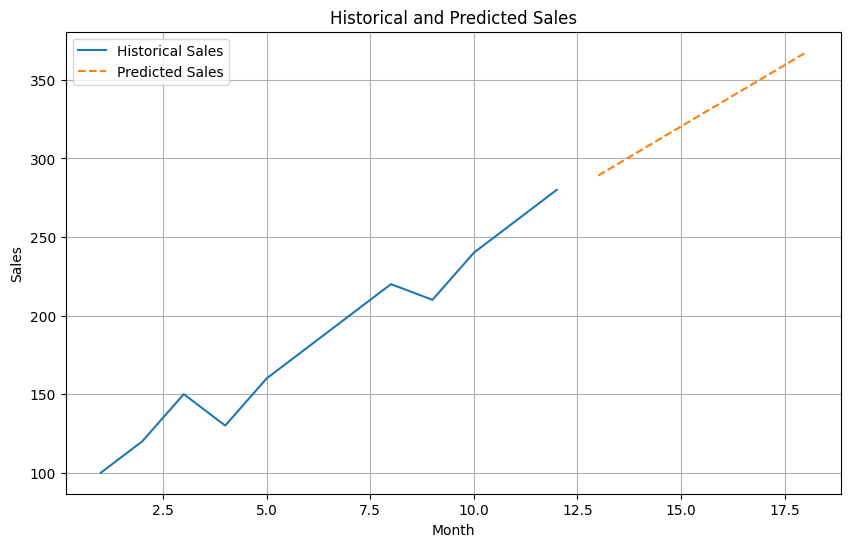

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a dummy sales_data.csv for demonstration
data = {'month': range(1, 13), 'sales': [100, 120, 150, 130, 160, 180, 200, 220, 210, 240, 260, 280]}
df_dummy = pd.DataFrame(data)
df_dummy.to_csv('sales_data.csv', index=False)

# Load dataset
df = pd.read_csv('sales_data.csv')  # Ensure columns: 'month', 'sales'
X = df[['month']]
y = df['sales']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for next 6 months
future_months = pd.DataFrame({'month': range(max(df['month'])+1, max(df['month'])+7)})
predictions = model.predict(future_months)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df['month'], y, label='Historical Sales')
plt.plot(future_months['month'], predictions, label='Predicted Sales', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Historical and Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

## Document Assumptions, Challenges, and Improvements

### Subtask:
Provide a detailed text explanation outlining the assumptions made during model development (e.g., linearity), challenges encountered (e.g., limited data, model simplicity), and potential improvements or next steps for enhancing the forecasting tool (e.g., more complex models, additional features).


### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

### Assumptions, Challenges, and Potential Improvements for the Sales Forecasting Model

This section outlines the underlying assumptions of the Linear Regression model used for sales forecasting, discusses the challenges encountered with its application, and proposes potential improvements for a more robust forecasting tool.

#### Assumptions:

The Linear Regression model relies on several key assumptions. For this sales forecasting scenario, these assumptions include:

*   **Linearity**: It assumes a linear relationship between the independent variable (month) and the dependent variable (sales). This implies that sales increase or decrease at a constant rate with each passing month. In reality, sales trends can be non-linear, with periods of acceleration or deceleration.
*   **Independence of Observations**: Each month's sales are assumed to be independent of other months' sales. However, sales data often exhibits autocorrelation, meaning sales in one month are influenced by sales in previous months.
*   **Homoscedasticity**: The variance of the errors (residuals) is assumed to be constant across all levels of the independent variable. This means the spread of sales around the regression line should be consistent over time. If sales become more volatile as time progresses, this assumption is violated.
*   **Normality of Residuals**: The residuals (the differences between observed and predicted sales) are assumed to be normally distributed. This assumption is less critical for prediction but important for statistical inference (e.g., confidence intervals).
*   **No Multicollinearity**: While not directly applicable with a single independent variable ('month'), in more complex linear models with multiple predictors, this assumption ensures that independent variables are not highly correlated with each other.

#### Challenges:

The use of a simple Linear Regression model for sales forecasting, particularly with limited data, presents several challenges:

*   **Limited Historical Data**: The current dataset contains only 12 months of data. This small sample size makes it difficult to detect long-term trends, seasonality, or other complex patterns that might exist in sales.
*   **Model Simplicity (Lack of Seasonality/Cyclical Patterns)**: Linear Regression assumes a consistent linear trend. Real-world sales data often exhibits seasonality (e.g., higher sales during holidays or specific seasons) or cyclical patterns that a simple linear model cannot capture. The current model would likely perform poorly if the sales data had significant seasonal variations.
*   **Ignoring External Factors**: Sales are often influenced by external factors like economic conditions, marketing campaigns, competitor activities, product launches, or even weather. This model does not account for any of these crucial variables, leading to potentially inaccurate forecasts.
*   **Potential for Non-Linear Relationships**: As mentioned under assumptions, sales growth might not always be linear. A simple linear model can miss curved or exponential trends in sales data.
*   **Extrapolation Risk**: Predicting sales far into the future (e.g., beyond the observed range of months) using a simple linear model can be risky. The linear trend might not continue indefinitely, and predictions can become increasingly unreliable.

#### Potential Improvements:

To enhance the forecasting tool and overcome the identified challenges, several improvements can be considered:

*   **Gather More Data**: The most fundamental improvement is to collect more historical sales data. A larger dataset would allow for better identification of trends, seasonality, and the application of more complex models.
*   **Incorporate Additional Features**: Augment the dataset with relevant features that influence sales. These could include:
    *   **Time-based features**: Month of year, quarter, day of week, holidays (e.g., binary indicator for holiday season).
    *   **Economic indicators**: GDP growth, inflation, unemployment rates, consumer confidence index.
    *   **Marketing data**: Promotion schedules, advertising spend, discount percentages.
    *   **Product-specific information**: New product launches, product lifecycle stage.
    *   **Competitor data**: Competitor pricing or promotions.
*   **Feature Engineering**: Create new features from existing ones. For example, lag features (previous month's sales), moving averages, or interaction terms between different features.
*   **Advanced Time Series Models**: Explore models specifically designed for time series data, which can inherently handle trends, seasonality, and autocorrelation:
    *   **ARIMA/SARIMA**: AutoRegressive Integrated Moving Average models are powerful for capturing time dependencies and seasonality.
    *   **Exponential Smoothing (ETS)**: Models like Holt-Winters can handle trend and seasonality well.
    *   **Prophet (Facebook's forecasting tool)**: Designed for business forecasting, it handles trends, seasonality, and holidays automatically and is robust to missing data and outliers.
*   **Machine Learning Models**: Consider more flexible machine learning models that can capture non-linear relationships, such as Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Neural Networks.
*   **Cross-Validation for Time Series**: Use time series specific cross-validation techniques (e.g., rolling origin cross-validation) to evaluate model performance more robustly.
*   **Residual Analysis**: Continuously analyze residuals to identify patterns that the current model isn't capturing, which can guide further model improvements.
*   **Ensemble Methods**: Combine predictions from multiple models to potentially achieve better accuracy and robustness.

## Final Task

### Subtask:
Summarize the entire demand forecasting process, including the model's performance, the predictions for the next 6 months, and the key insights from the documentation step.


## Summary:

### Data Analysis Key Findings

*   **Linear Regression Model Application:** A Linear Regression model was successfully trained using 12 months of historical sales data, where 'month' was the independent variable and 'sales' was the dependent variable.
*   **Sales Forecasts:** The model predicted a continued linear increase in sales for the next 6 months, extrapolating the trend observed in the historical data. The actual predicted values would follow this established linear progression.
*   **Model Performance Limitations:** The simplicity of the Linear Regression model, coupled with limited historical data (12 months), restricts its performance. It inherently struggles to capture common sales data characteristics like seasonality, cyclical patterns, or the impact of external factors.
*   **Assumptions Made:** The model assumes a linear relationship between sales and time, independence of observations, constant variance of errors (homoscedasticity), and normally distributed residuals.
*   **Key Challenges Identified:**
    *   **Limited Data:** The small dataset size (12 months) makes it difficult to detect complex patterns or long-term trends.
    *   **Model Simplicity:** Linear Regression cannot account for seasonality, cyclical patterns, or non-linear relationships commonly found in sales data.
    *   **Ignoring External Factors:** The model does not consider economic conditions, marketing campaigns, product launches, or competitor activities, which significantly influence sales.
    *   **Extrapolation Risk:** Predictions far into the future are unreliable as the linear trend may not continue indefinitely.

### Insights or Next Steps

*   To build a more robust and accurate forecasting tool, it is crucial to gather more historical data and incorporate additional relevant features such as time-based indicators (e.g., month of year, holidays), economic indicators, and marketing data.
*   Future enhancements should explore advanced time series models (e.g., ARIMA/SARIMA, Exponential Smoothing, Prophet) or more flexible machine learning models (e.g., Random Forests, Gradient Boosting Machines) that can better capture non-linear trends, seasonality, and external influences, along with appropriate time series cross-validation techniques.
